# Clean pe_contratos


### Goals
- Propose query to clean data
- Understand the content of the most important fields
- Clean the key rows
- Generate insights about possible further research

### Query

```CREATE TABLE analise_corrupcao_cluster.pe_contratos AS (
  SELECT *
  FROM br_gov_despesas_municipais_tce_pe_contratos.contratos
  WHERE numerodocumentoajustado !~ '[A-Z]+|,')
  ```

### Results

 The fields that are most importants, for know, are the key ones **numerodocumentoajustado** and **codigoug** because they are necessary to bind data with different tables.
 
 Everything seems normal. The correlation between fields also seem fine.
 
 As usual, there are few companies that share most of the contracts. I did not get the proportions, but this is a interesting investigations topic.

### Methodology

In [8]:
from sqlalchemy import create_engine
import pandas as pd
from pandas_summary import DataFrameSummary
import copy
import seaborn as sns

pd.options.display.max_columns = 999

import yaml
con_link = yaml.load(open('db_links.yaml', 'r'))['postgre']
con = create_engine(con_link)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 12)

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['full', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Count the number of rows

In [2]:
pd.read_sql_query('SELECT COUNT(*) FROM br_gov_ceis.ceis', con).values[0][0]

11526

### Describe colums

In [3]:
full = pd.read_sql_query('SELECT * FROM br_gov_ceis.ceis', con)

In [4]:
full

,cnpj,tipo,razao,tipo_susp,inicio,final,sancionador,uf_sancionador,origem_info
0,cnpj_cpf,tipo,razao,tipo_suspensao,inicio,final,sancionador,uf_sancionador,origem_info
1,73440329887,Física,ALDERICE SCAPIN,Proibição - Lei de Improbidade,2013/02/14,2018/02/14,Justiça Estadual,None,Conselho Nacional de Justiça
2,97351258000174,Juridica,DISMAHC COM E REP DE MATERIAL HOSPITALAR E CIR...,Suspensão - Lei de Licitações,2017/07/12,2018/01/11,Empresa Brasileira de Serviços Hospitalares - ...,PI,Empresa Brasileira de Serviços Hospitalares - ...
3,5255469000195,Juridica,"SANTOS, CORREIA CONSTRUCOES E EMPREENDIMENTOS ...",Inidoneidade - Lei Orgânica TCU,2015/08/19,2018/08/19,TRIBUNAL DE CONTAS DA UNIÃO,DF,TRIBUNAL DE CONTAS DA UNIÃO
4,8139629000129,Juridica,ADSERTE ADMINISTRACAO E TERCEIRIZACAO DE MAO D...,Suspensão - Lei de Licitações,2017/02/23,2019/02/22,BANCO CENTRAL DO BRASIL,DF,BANCO CENTRAL DO BRASIL
5,8139629000129,Juridica,ADSERTE ADMINISTRACAO E TERCEIRIZACAO DE MAO D...,Suspensão - Lei de Licitações,2017/04/25,2018/01/24,"MINISTÉRIO DO PLANEJAMENTO, ORÇAMENTO E GESTÃO",DF,"MINISTÉRIO DO PLANEJAMENTO, ORÇAMENTO E GESTÃO"
6,17888464000189,Juridica,1001 ADMINISTRACAO E PARTICIPACOES S.A.,Suspensão - Lei de Licitações,2016/09/08,2018/09/07,Empresa Brasileira de Infra-Estrutura Aeroport...,SP,Empresa Brasileira de Infra-Estrutura Aeroport...
7,17888464000189,Juridica,1001 ADMINISTRACAO E PARTICIPACOES S.A.,Suspensão - Lei de Licitações,2017/02/17,2019/02/16,Empresa Brasileira de Infra-Estrutura Aeroport...,DF,Empresa Brasileira de Infra-Estrutura Aeroport...
8,12492619000140,Juridica,1001 MATERIAIS DE CONSTRUCAO LTDA - EPP,Impedimento - Lei do Pregão,2017/03/28,2018/03/27,Município de Porto Alegre - Central de Licitaç...,RS,Município de Porto Alegre - Central de Licitaç...
9,4679852000108,Juridica,2002 DISTRIBUIDORA E COMERCIO LTDA - ME,Proibição - Lei Eleitoral,2014/06/05,2019/06/05,Tribunal Regional Eleitoral da Bahia,BA,Tribunal Regional Eleitoral da Bahia


In [11]:
full = pd.read_sql_query("""
                        SELECT *
                        FROM br_gov_ceis.ceis
                        WHERE cnpj !~ '[a-zA-Z]+|,'
                        """, con)

In [12]:
full

,cnpj,tipo,razao,tipo_susp,inicio,final,sancionador,uf_sancionador,origem_info
0,73440329887,Física,ALDERICE SCAPIN,Proibição - Lei de Improbidade,2013/02/14,2018/02/14,Justiça Estadual,None,Conselho Nacional de Justiça
1,97351258000174,Juridica,DISMAHC COM E REP DE MATERIAL HOSPITALAR E CIR...,Suspensão - Lei de Licitações,2017/07/12,2018/01/11,Empresa Brasileira de Serviços Hospitalares - ...,PI,Empresa Brasileira de Serviços Hospitalares - ...
2,5255469000195,Juridica,"SANTOS, CORREIA CONSTRUCOES E EMPREENDIMENTOS ...",Inidoneidade - Lei Orgânica TCU,2015/08/19,2018/08/19,TRIBUNAL DE CONTAS DA UNIÃO,DF,TRIBUNAL DE CONTAS DA UNIÃO
3,8139629000129,Juridica,ADSERTE ADMINISTRACAO E TERCEIRIZACAO DE MAO D...,Suspensão - Lei de Licitações,2017/02/23,2019/02/22,BANCO CENTRAL DO BRASIL,DF,BANCO CENTRAL DO BRASIL
4,8139629000129,Juridica,ADSERTE ADMINISTRACAO E TERCEIRIZACAO DE MAO D...,Suspensão - Lei de Licitações,2017/04/25,2018/01/24,"MINISTÉRIO DO PLANEJAMENTO, ORÇAMENTO E GESTÃO",DF,"MINISTÉRIO DO PLANEJAMENTO, ORÇAMENTO E GESTÃO"
5,17888464000189,Juridica,1001 ADMINISTRACAO E PARTICIPACOES S.A.,Suspensão - Lei de Licitações,2016/09/08,2018/09/07,Empresa Brasileira de Infra-Estrutura Aeroport...,SP,Empresa Brasileira de Infra-Estrutura Aeroport...
6,17888464000189,Juridica,1001 ADMINISTRACAO E PARTICIPACOES S.A.,Suspensão - Lei de Licitações,2017/02/17,2019/02/16,Empresa Brasileira de Infra-Estrutura Aeroport...,DF,Empresa Brasileira de Infra-Estrutura Aeroport...
7,12492619000140,Juridica,1001 MATERIAIS DE CONSTRUCAO LTDA - EPP,Impedimento - Lei do Pregão,2017/03/28,2018/03/27,Município de Porto Alegre - Central de Licitaç...,RS,Município de Porto Alegre - Central de Licitaç...
8,4679852000108,Juridica,2002 DISTRIBUIDORA E COMERCIO LTDA - ME,Proibição - Lei Eleitoral,2014/06/05,2019/06/05,Tribunal Regional Eleitoral da Bahia,BA,Tribunal Regional Eleitoral da Bahia
9,2023453000169,Juridica,2007 ATA INOVACAO EM SERVICOS TECNICOS OPERACI...,Inidoneidade - Lei de Licitações,2014/03/11,None,DEPARTAMENTO DE TRÂNSITO DO ESTADO DO RJ,RJ,Governo do Estado do Rio de Janeiro


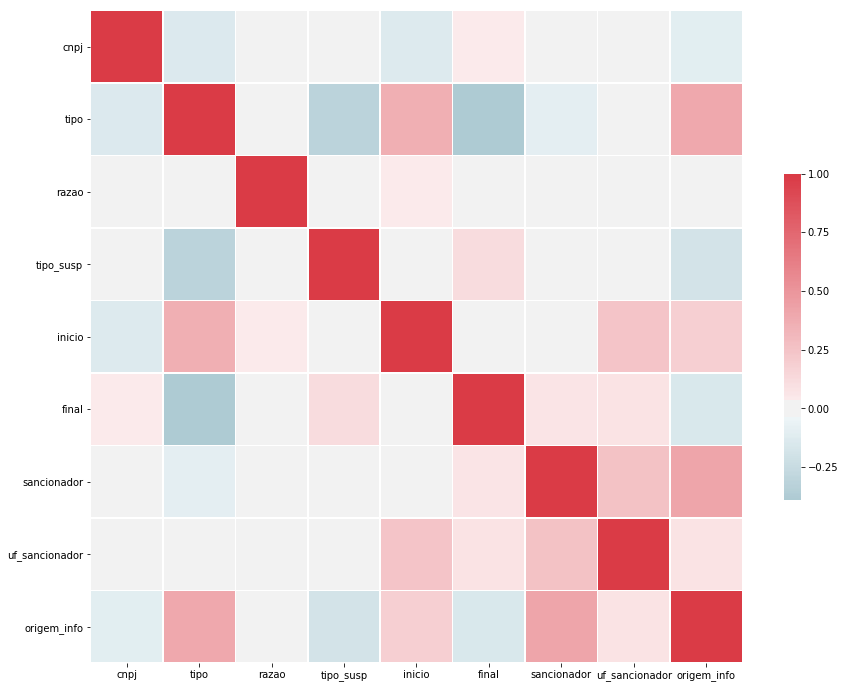

In [13]:
full_numeric = full

for col in full.columns:
    
    full_numeric[col] = full_numeric[col].astype("category").cat.codes
    
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = full_numeric.corr()
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
a = []
def to_int(x):
    
    try:
        return int(x)
    except:
        a.append(x)
        return None

full['cnpj'] = full['cnpj'].apply(to_int)

[]